In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## <h2 style="text-align: center; color: #4c4cff;">👨‍💻 About the Author</h2>

**Name**: Arif Miah  

🎓 **Profession**: Machine Learning Engineer  

🔍 I am a passionate **Machine Learning Engineer** with expertise in building real-world solutions using **Machine Learning, Deep Learning, Computer Vision**, and **Data Science**. I love turning data into meaningful insights and solving complex challenges using cutting-edge technologies.  

💻 **Skills**:
- Machine Learning & Deep Learning  
- Natural Language Processing (NLP)  
- Computer Vision & Data Analysis  
- Python Programming  
- Model Deployment  

---

### 🌐 Connect with Me  

📧 **Email**: [arifmiahcse@gmail.com](mailto:arifmiahcse@gmail.com)  

🔗 **LinkedIn**: [LinkedIn Profile](https://www.linkedin.com/in/arif-miah)  

🐱 **GitHub**: [GitHub Profile](https://github.com/Arif-miad)  

📝 **Kaggle**: [Kaggle Profile](https://www.kaggle.com/arifmia)  

---


<div style="background-color: #FFA07A; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Import libaries</h2>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



<div style="background-color: #FFA07A; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Load the dataset</h2>

In [2]:
df = pd.read_csv("/kaggle/input/electric-vehicle-population/EV_Population.csv")

In [3]:
df.head()

,State,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,CAFV Eligibility Simple
0,WA,2020,TESLA,BEV,266,0,46.0,Eligible
1,WA,2024,BMW,PHEV,39,0,46.0,Eligible
2,WA,2024,BMW,PHEV,39,0,43.0,Eligible
3,WA,2018,TESLA,BEV,215,0,1.0,Eligible
4,WA,2012,CHEVROLET,PHEV,35,0,35.0,Eligible


In [4]:
df.shape

(92676, 8)

In [5]:
df.isnull().sum()

State                      0
Model Year                 0
Make                       0
Electric Vehicle Type      0
Electric Range             0
Base MSRP                  0
Legislative District       0
CAFV Eligibility Simple    0
dtype: int64

In [6]:
df.duplicated().sum()

81338

<div style="background-color: #FFA07A; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Data explore<h2>

In [7]:
duplicates = df.duplicated(keep=False)

In [8]:
duplicates 

0        True
1        True
2        True
3        True
4        True
         ... 
92671    True
92672    True
92673    True
92674    True
92675    True
Length: 92676, dtype: bool

In [9]:
 #Add a column to indicate duplicates for visualization
df['Is_Duplicate'] = duplicates


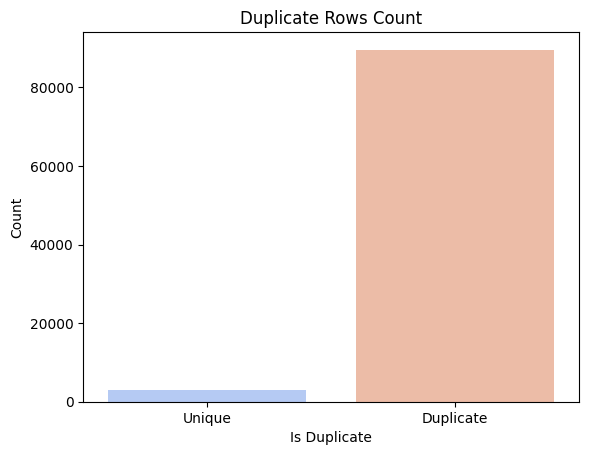

In [10]:
# Plotting the distribution of duplicate values
sns.countplot(data=df, x='Is_Duplicate', palette='coolwarm')
plt.title('Duplicate Rows Count')
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Unique', 'Duplicate'])
plt.show()

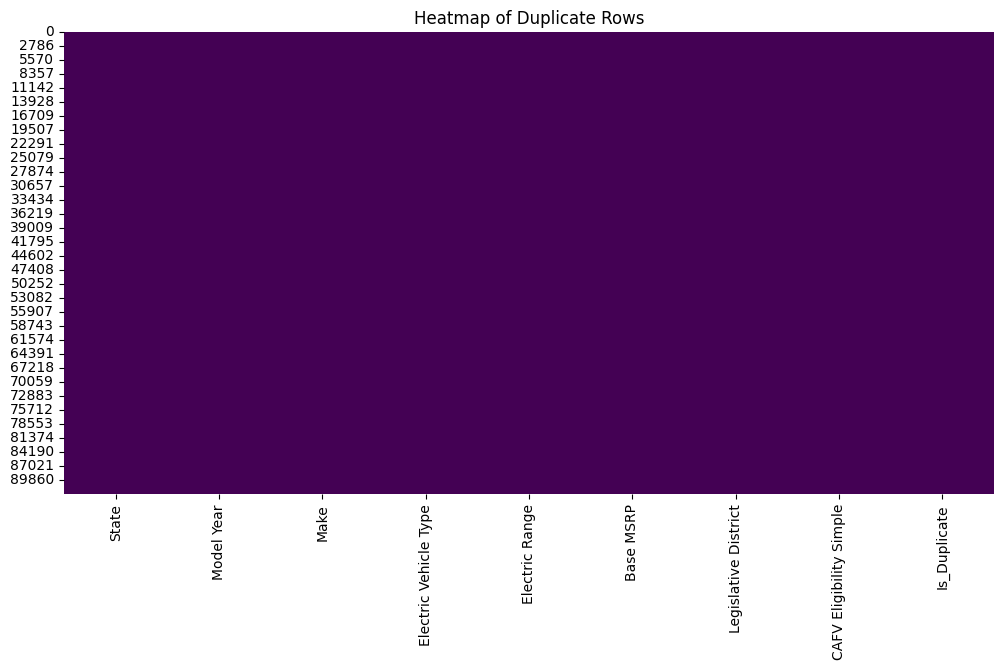

In [11]:
duplicate_rows = df[df['Is_Duplicate']]

plt.figure(figsize=(12, 6))
sns.heatmap(duplicate_rows.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Duplicate Rows')
plt.show()

In [12]:
# Remove duplicate rows and keep the first occurrence
df = df.drop_duplicates(keep='first')

# Reset the index (optional)
df.reset_index(drop=True, inplace=True)

print("Dataset after removing duplicates:", df)


Dataset after removing duplicates:       State  Model Year       Make Electric Vehicle Type  Electric Range  \
0        WA        2020      TESLA                   BEV             266   
1        WA        2024        BMW                  PHEV              39   
2        WA        2024        BMW                  PHEV              39   
3        WA        2018      TESLA                   BEV             215   
4        WA        2012  CHEVROLET                  PHEV              35   
...     ...         ...        ...                   ...             ...   
11333    WA        2018       FORD                   BEV             100   
11334    WA        2020       FORD                  PHEV              26   
11335    WA        2021    LINCOLN                  PHEV              21   
11336    WA        2021        KIA                  PHEV              26   
11337    WA        2023    HYUNDAI                  PHEV              33   

       Base MSRP  Legislative District CAFV Eligibil

<div style="background-color: #FFA07A; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Exploratory data analysis</h2>

In [13]:
df.duplicated().sum()

0

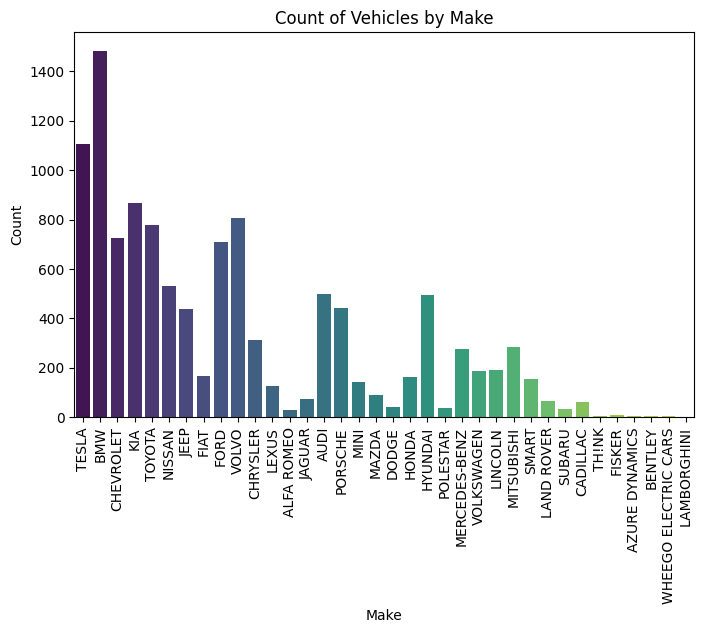

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Make", palette="viridis")
plt.title("Count of Vehicles by Make")
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


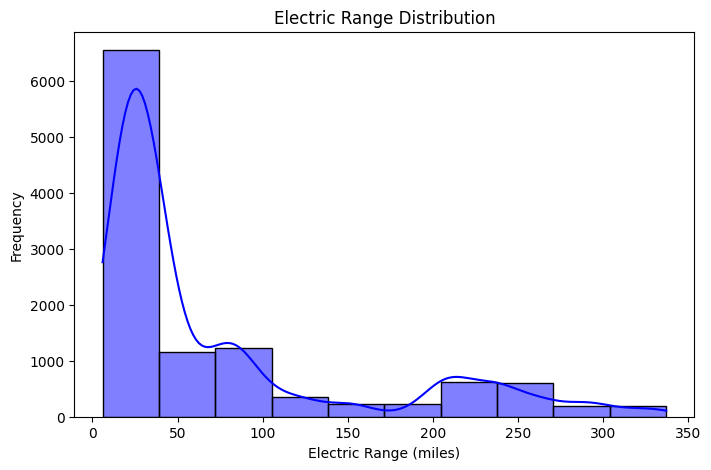

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Electric Range", kde=True, bins=10, color="blue")
plt.title("Electric Range Distribution")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.show()


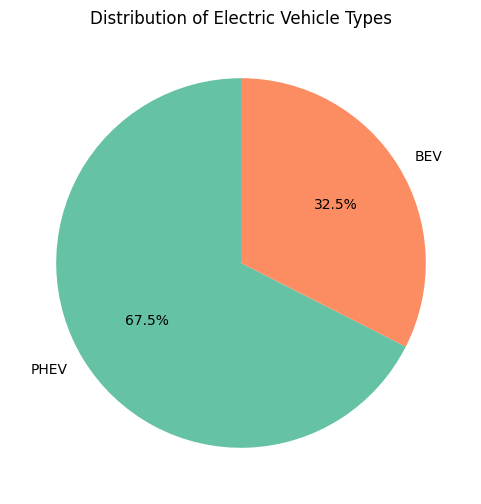

In [17]:
df['Electric Vehicle Type'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"), figsize=(6, 6)
)
plt.title("Distribution of Electric Vehicle Types")
plt.ylabel("")
plt.show()


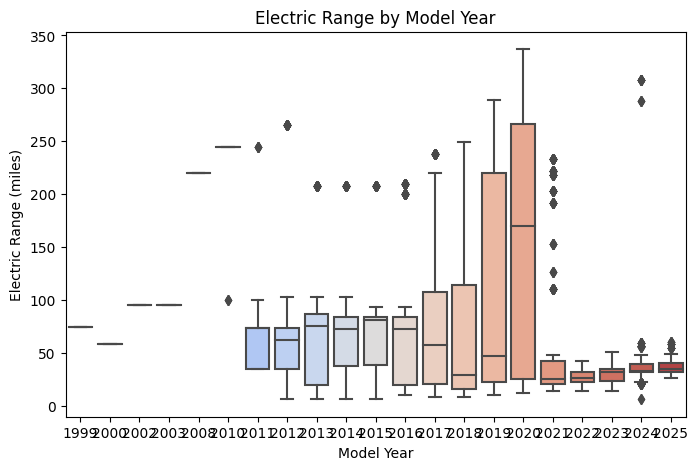

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Model Year", y="Electric Range", palette="coolwarm")
plt.title("Electric Range by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.show()


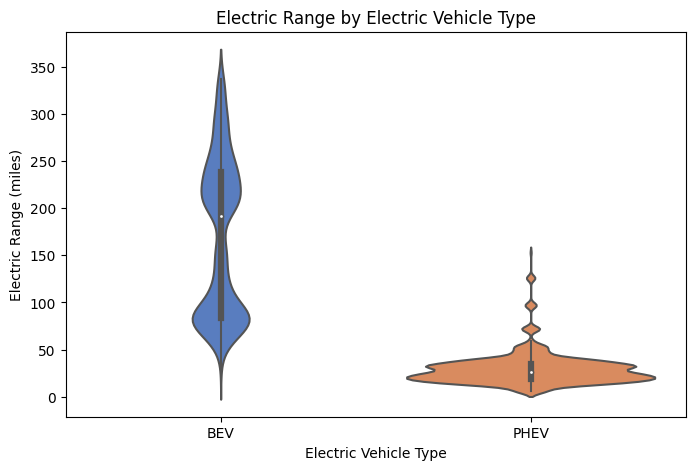

In [19]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="Electric Vehicle Type", y="Electric Range", palette="muted")
plt.title("Electric Range by Electric Vehicle Type")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Electric Range (miles)")
plt.show()


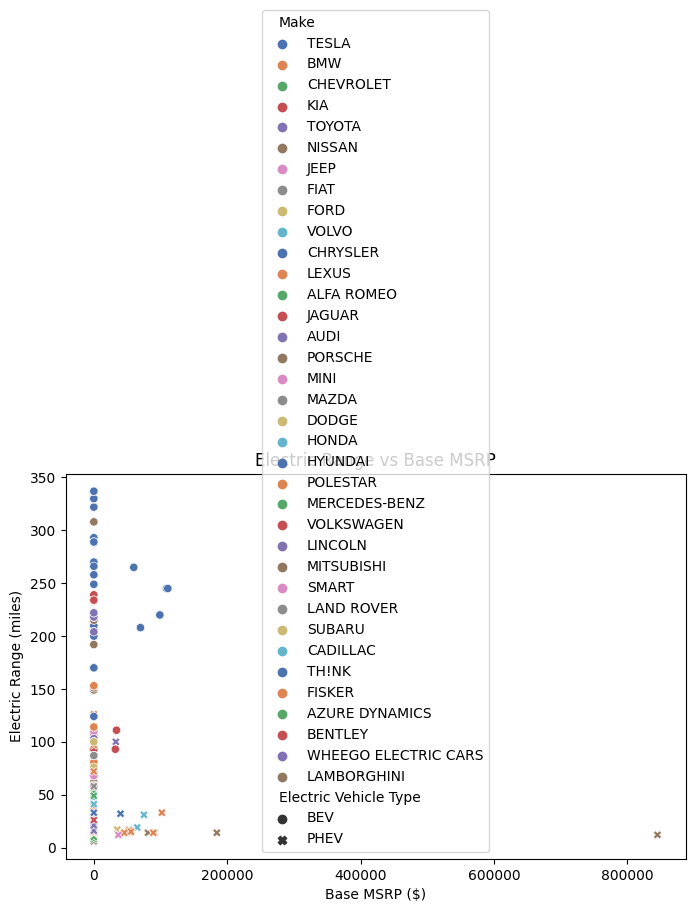

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Base MSRP", y="Electric Range", hue="Make", style="Electric Vehicle Type", palette="deep")
plt.title("Electric Range vs Base MSRP")
plt.xlabel("Base MSRP ($)")
plt.ylabel("Electric Range (miles)")
plt.show()


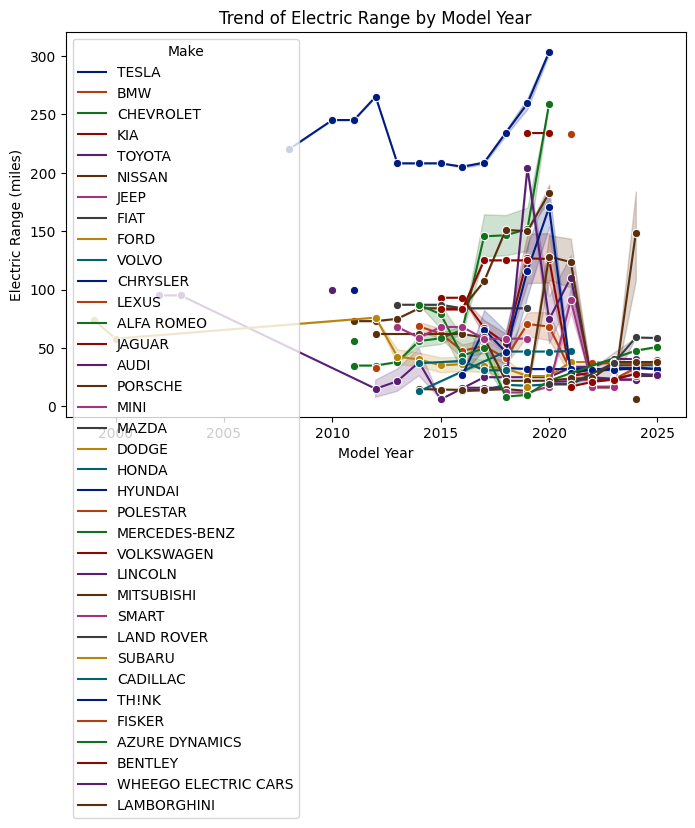

In [21]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="Model Year", y="Electric Range", marker="o", hue="Make", palette="dark")
plt.title("Trend of Electric Range by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.show()


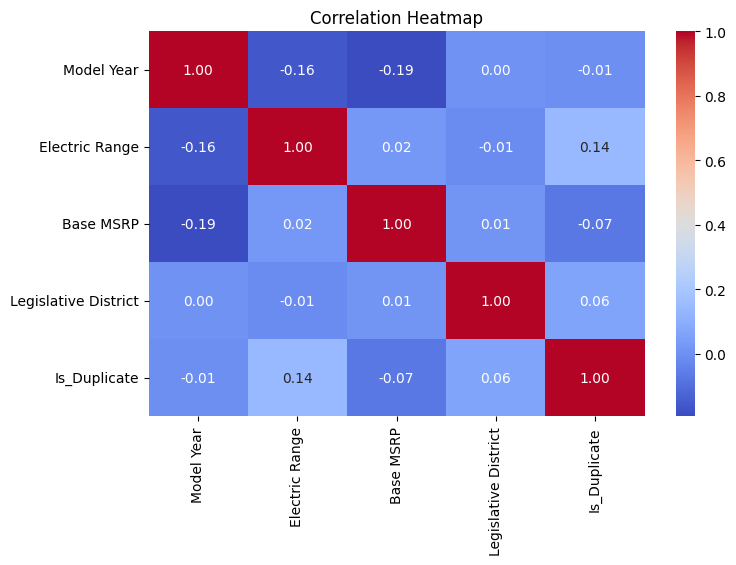

In [22]:
plt.figure(figsize=(8, 5))
corr_matrix = df.corr(numeric_only=True)  # Compute correlations for numeric columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [26]:
fig = px.bar(
    df,
    x="Legislative District",
    y="Electric Range",
    color="Make",
    barmode="group",
    title="Electric Range by Legislative District",
    labels={"Electric Range": "Electric Range (miles)"},
)
fig.show()


In [27]:
fig = px.scatter(
    df,
    x="Base MSRP",
    y="Electric Range",
    color="Make",
    size="Electric Range",
    hover_data=["Electric Vehicle Type"],
    title="Electric Range vs Base MSRP",
)
fig.show()


<div style="background-color: #FFA07A; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Data preprocessing</h2>

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print("Dataset after Label Encoding:")
print(df)


Dataset after Label Encoding:
       State  Model Year  Make  Electric Vehicle Type  Electric Range  \
0          0        2020    30                      0             266   
1          0        2024     4                      1              39   
2          0        2024     4                      1              39   
3          0        2018    30                      0             215   
4          0        2012     6                      1              35   
...      ...         ...   ...                    ...             ...   
11333      0        2018    11                      0             100   
11334      0        2020    11                      1              26   
11335      0        2021    20                      1              21   
11336      0        2021    16                      1              26   
11337      0        2023    13                      1              33   

       Base MSRP  Legislative District  CAFV Eligibility Simple  Is_Duplicate  
0            

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Apply MinMaxScaler to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Dataset after Min-Max Scaling:")
print(df)


Dataset after Min-Max Scaling:
       State  Model Year      Make  Electric Vehicle Type  Electric Range  \
0        0.0    0.807692  0.857143                    0.0        0.785498   
1        0.0    0.961538  0.114286                    1.0        0.099698   
2        0.0    0.961538  0.114286                    1.0        0.099698   
3        0.0    0.730769  0.857143                    0.0        0.631420   
4        0.0    0.500000  0.171429                    1.0        0.087613   
...      ...         ...       ...                    ...             ...   
11333    0.0    0.730769  0.314286                    0.0        0.283988   
11334    0.0    0.807692  0.314286                    1.0        0.060423   
11335    0.0    0.846154  0.571429                    1.0        0.045317   
11336    0.0    0.846154  0.457143                    1.0        0.060423   
11337    0.0    0.923077  0.371429                    1.0        0.081571   

       Base MSRP  Legislative District  CAFV

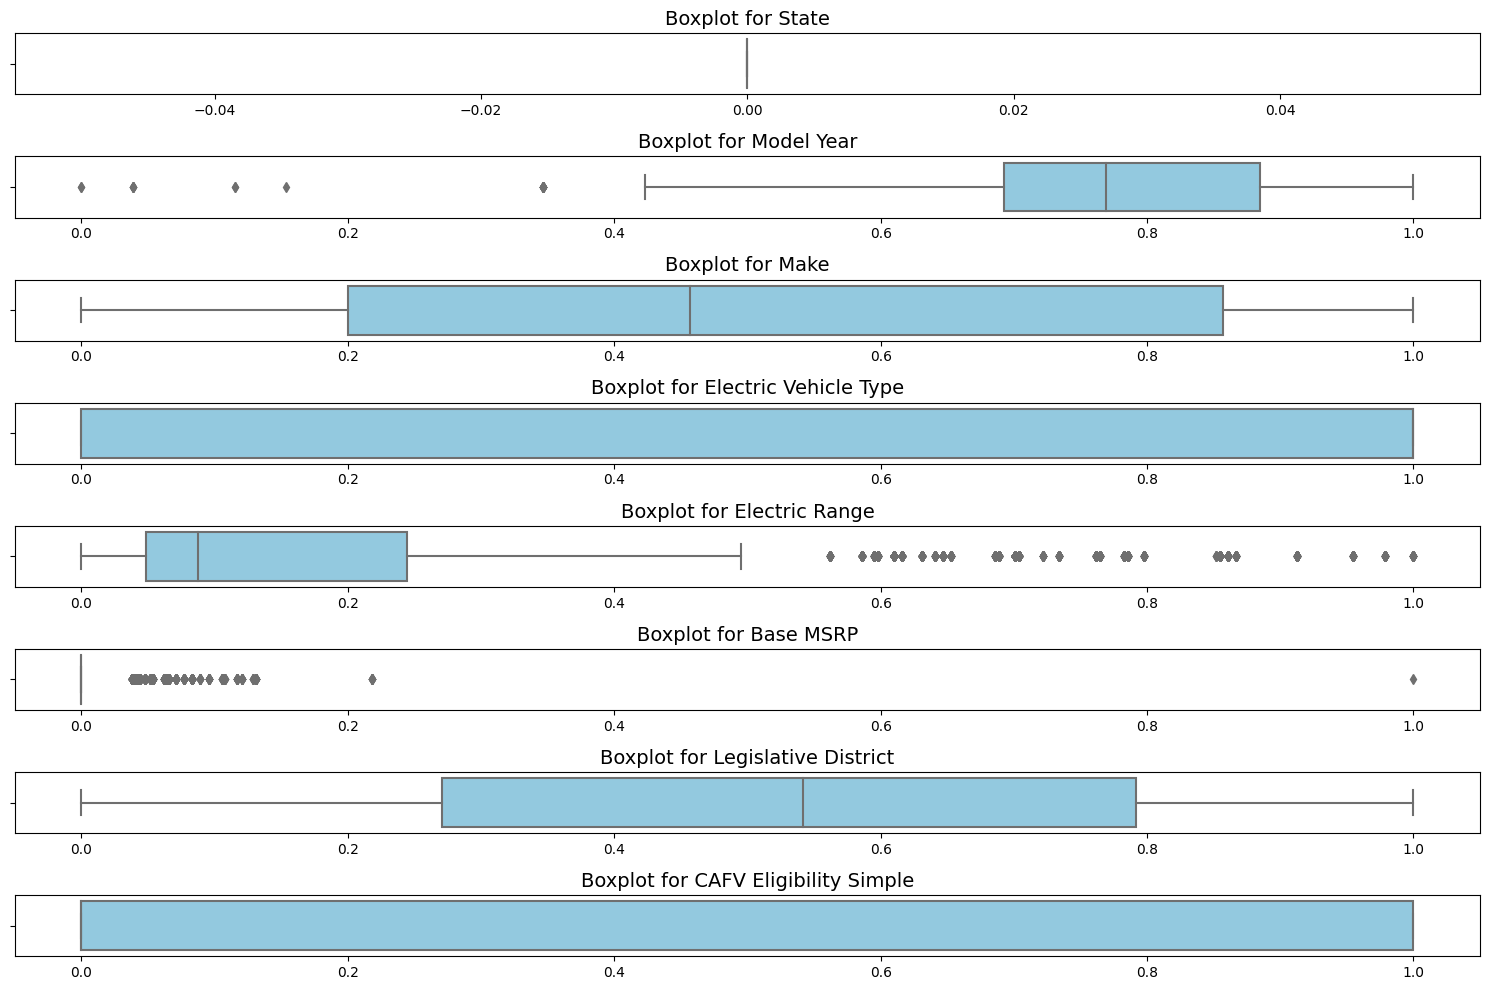

In [30]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot for {col}', fontsize=14)
    plt.xlabel('')
    plt.tight_layout()

plt.show()


In [31]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                   # Interquartile range
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows within bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Remove outliers from all numerical columns
for col in numerical_columns:
    df = remove_outliers_iqr(df, col)

print("Dataset after removing outliers:")
print(df)


Dataset after removing outliers:
       State  Model Year      Make  Electric Vehicle Type  Electric Range  \
1        0.0    0.961538  0.114286                    1.0        0.099698   
2        0.0    0.961538  0.114286                    1.0        0.099698   
4        0.0    0.500000  0.171429                    1.0        0.087613   
8        0.0    0.807692  0.914286                    1.0        0.057402   
9        0.0    0.576923  0.714286                    0.0        0.235650   
...      ...         ...       ...                    ...             ...   
11333    0.0    0.730769  0.314286                    0.0        0.283988   
11334    0.0    0.807692  0.314286                    1.0        0.060423   
11335    0.0    0.846154  0.571429                    1.0        0.045317   
11336    0.0    0.846154  0.457143                    1.0        0.060423   
11337    0.0    0.923077  0.371429                    1.0        0.081571   

       Base MSRP  Legislative District  CA

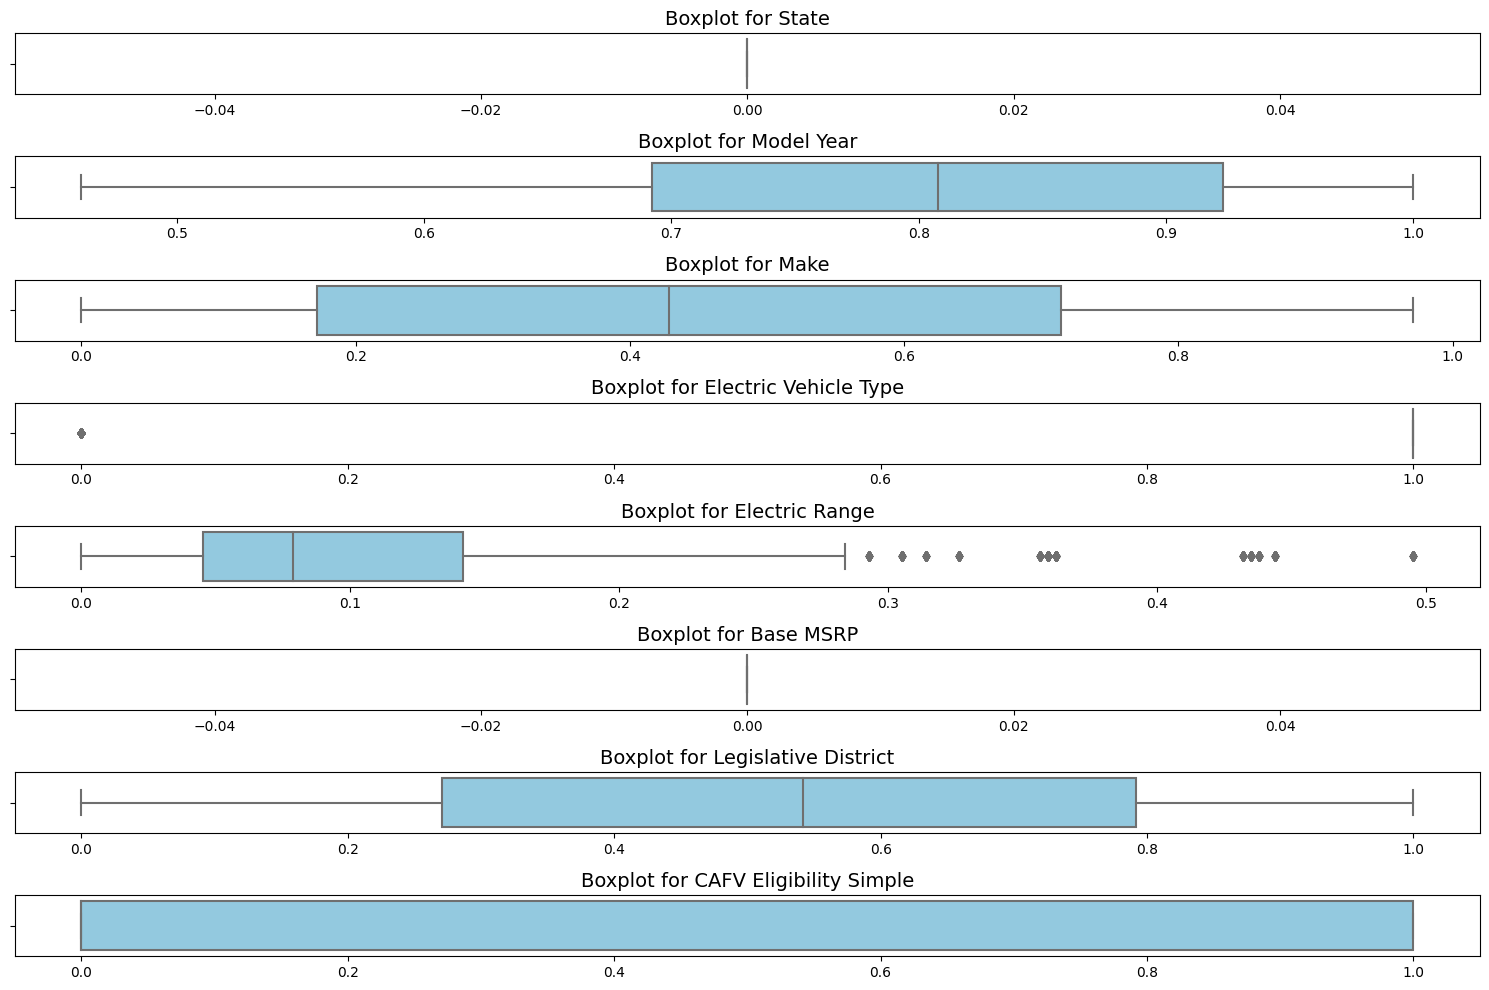

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot for {col}', fontsize=14)
    plt.xlabel('')
    plt.tight_layout()

plt.show()


In [33]:
df

,State,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,CAFV Eligibility Simple,Is_Duplicate
1,0.0,0.961538,0.114286,1.0,0.099698,0.0,0.937500,0.0,True
2,0.0,0.961538,0.114286,1.0,0.099698,0.0,0.875000,0.0,True
4,0.0,0.500000,0.171429,1.0,0.087613,0.0,0.708333,0.0,True
8,0.0,0.807692,0.914286,1.0,0.057402,0.0,0.187500,1.0,True
9,0.0,0.576923,0.714286,0.0,0.235650,0.0,0.958333,0.0,True
...,...,...,...,...,...,...,...,...,...
11333,0.0,0.730769,0.314286,0.0,0.283988,0.0,0.229167,0.0,False
11334,0.0,0.807692,0.314286,1.0,0.060423,0.0,0.145833,1.0,False
11335,0.0,0.846154,0.571429,1.0,0.045317,0.0,0.166667,1.0,False
11336,0.0,0.846154,0.457143,1.0,0.060423,0.0,0.000000,1.0,False


In [34]:
# Drop the 'Is_Duplicate' column from the dataset
df = df.drop(columns=['Is_Duplicate'])

print("Dataset after deleting 'Is_Duplicate' column:")
print(df)


Dataset after deleting 'Is_Duplicate' column:
       State  Model Year      Make  Electric Vehicle Type  Electric Range  \
1        0.0    0.961538  0.114286                    1.0        0.099698   
2        0.0    0.961538  0.114286                    1.0        0.099698   
4        0.0    0.500000  0.171429                    1.0        0.087613   
8        0.0    0.807692  0.914286                    1.0        0.057402   
9        0.0    0.576923  0.714286                    0.0        0.235650   
...      ...         ...       ...                    ...             ...   
11333    0.0    0.730769  0.314286                    0.0        0.283988   
11334    0.0    0.807692  0.314286                    1.0        0.060423   
11335    0.0    0.846154  0.571429                    1.0        0.045317   
11336    0.0    0.846154  0.457143                    1.0        0.060423   
11337    0.0    0.923077  0.371429                    1.0        0.081571   

       Base MSRP  Legislative

<div style="background-color: #FFA07A; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Model building</h2>

In [38]:
X = df.drop('Electric Vehicle Type', axis=1)  # Replace 'Target' with the actual target column name
y = df['Electric Vehicle Type']  # Replace 'Target' with the actual target column name

In [39]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Define a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(probability=True)),
    ('Dummy Classifier', DummyClassifier(strategy='most_frequent')),
    ('Voting Classifier', VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))
    ], voting='soft'))
]

In [41]:

# Initialize results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

In [45]:
# Apply each classifier and evaluate performance
for name, clf in classifiers:
    # Cross-validation score
    cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.968379   0.968068  0.968379  0.968151  0.989350
1                  KNN  0.988142   0.988166  0.988142  0.988035  0.993219
2        Decision Tree  0.996612   0.996612  0.996612  0.996612  0.994401
3        Random Forest  0.996612   0.996612  0.996612  0.996612  0.996680
4    Gradient Boosting  0.998306   0.998310  0.998306  0.998303  0.999956
5             AdaBoost  0.998306   0.998310  0.998306  0.998303  0.999916
6          Naive Bayes  0.919255   0.942317  0.919255  0.924198  0.973415
7                  SVM  0.976285   0.976122  0.976285  0.975995  0.995052
8     Dummy Classifier  0.814229   0.662969  0.814229  0.730855  0.500000
9    Voting Classifier  0.988142   0.988098  0.988142  0.988107  0.995865


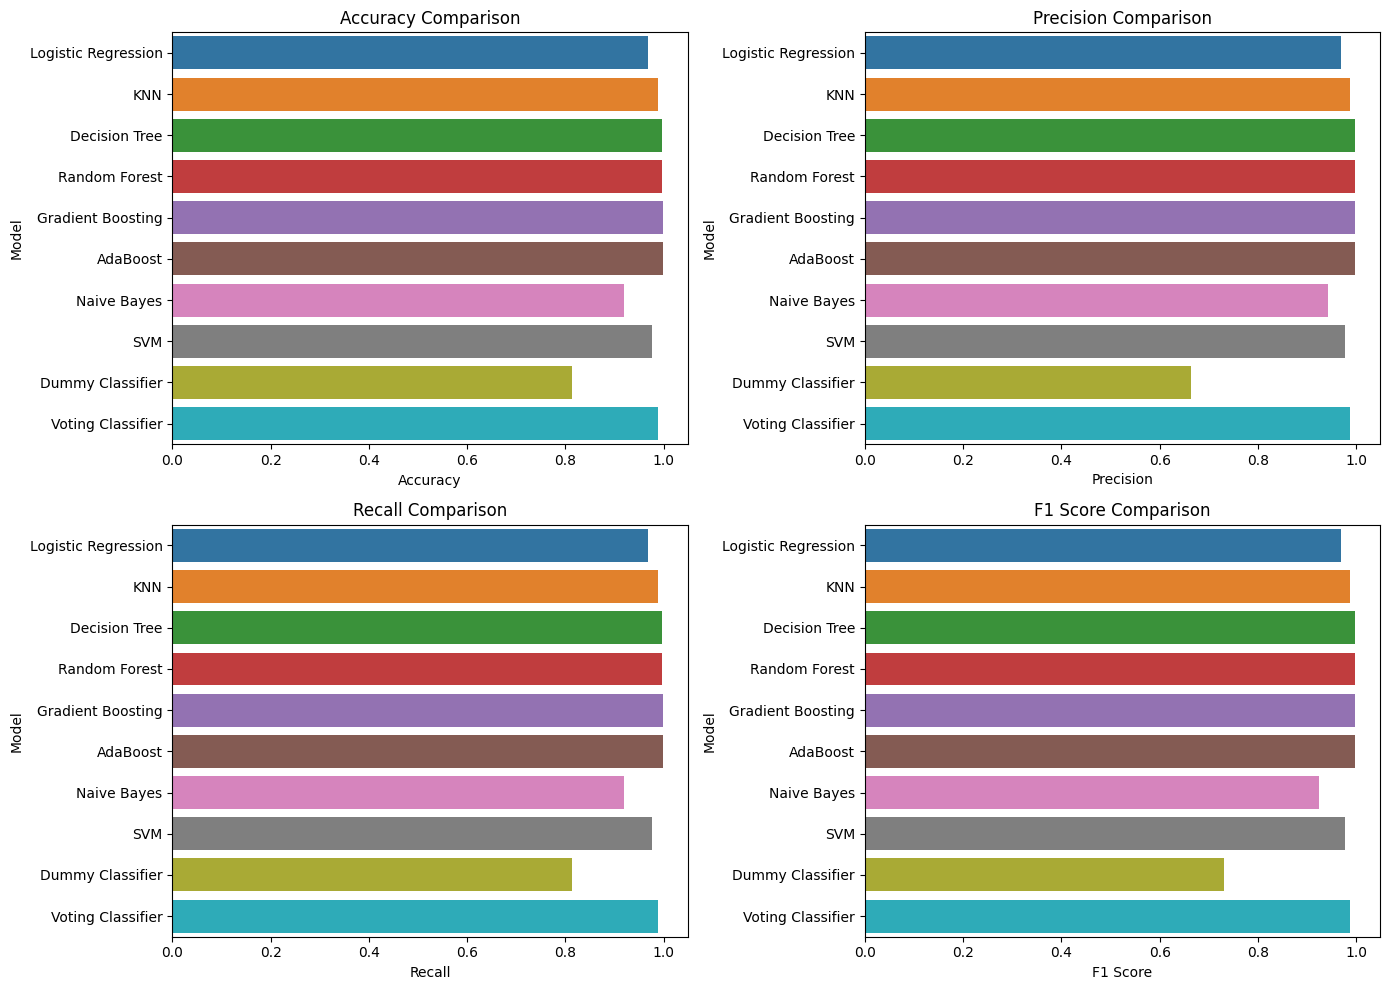

In [46]:
from sklearn.preprocessing import LabelBinarizer

# Check if the problem is binary or multi-class
is_binary = len(y.unique()) == 2  # Check if it's a binary classification problem

# Evaluate the models
for name, clf in classifiers:
    # Cross-validation score
    cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Calculate ROC AUC score for multi-class (One-vs-Rest)
    if not is_binary:  # Only compute ROC AUC for multi-class problems
        lb = LabelBinarizer()
        lb.fit(y)
        y_test_bin = lb.transform(y_test)
        y_pred_prob = clf.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr', average='weighted')
    else:  # For binary classification, use the original approach
        y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
        roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['ROC AUC'].append(roc_auc)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot the comparison of models' performance using accuracy, precision, recall, and F1 Score
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Plot
sns.barplot(x='Accuracy', y='Model', data=results_df, ax=ax[0, 0])
ax[0, 0].set_title('Accuracy Comparison')

# Precision Plot
sns.barplot(x='Precision', y='Model', data=results_df, ax=ax[0, 1])
ax[0, 1].set_title('Precision Comparison')

# Recall Plot
sns.barplot(x='Recall', y='Model', data=results_df, ax=ax[1, 0])
ax[1, 0].set_title('Recall Comparison')

# F1 Score Plot
sns.barplot(x='F1 Score', y='Model', data=results_df, ax=ax[1, 1])
ax[1, 1].set_title('F1 Score Comparison')

plt.tight_layout()
plt.show()


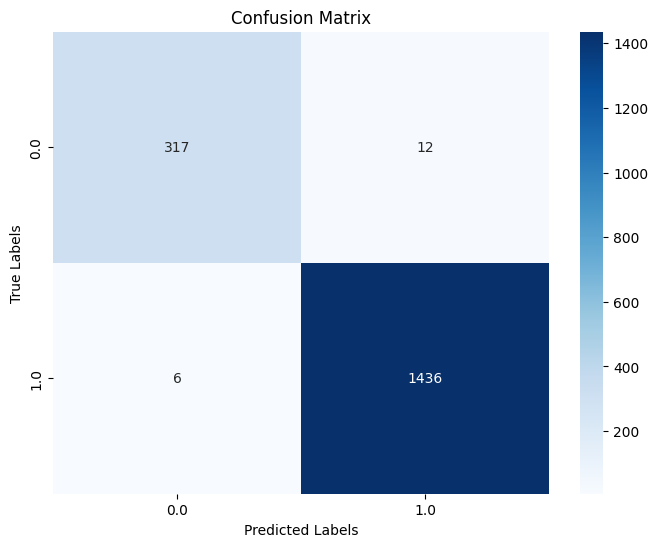

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Fit the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
